# E3-1 Artificial Intelligence With Machine Learning Algorithms
# Demo: Learning From Titanic
by Dora Dimitrova, CPHBUS
<br><br>
On April 15, 1912 happened the biggest and the most tragic ship crash in the history, where over [1,500 people](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) lost their life, and only 705 survived.
Now we will be reading the old records of the travel company and will try to identify some patterns that might be useful for prediction of future and imaginery survivals.
We will build machine learning demo code, which can illustrate solving a typical machine learning task.

*Please, note that what we work with are not just numbers, but figures, associated with real people's destiny!*


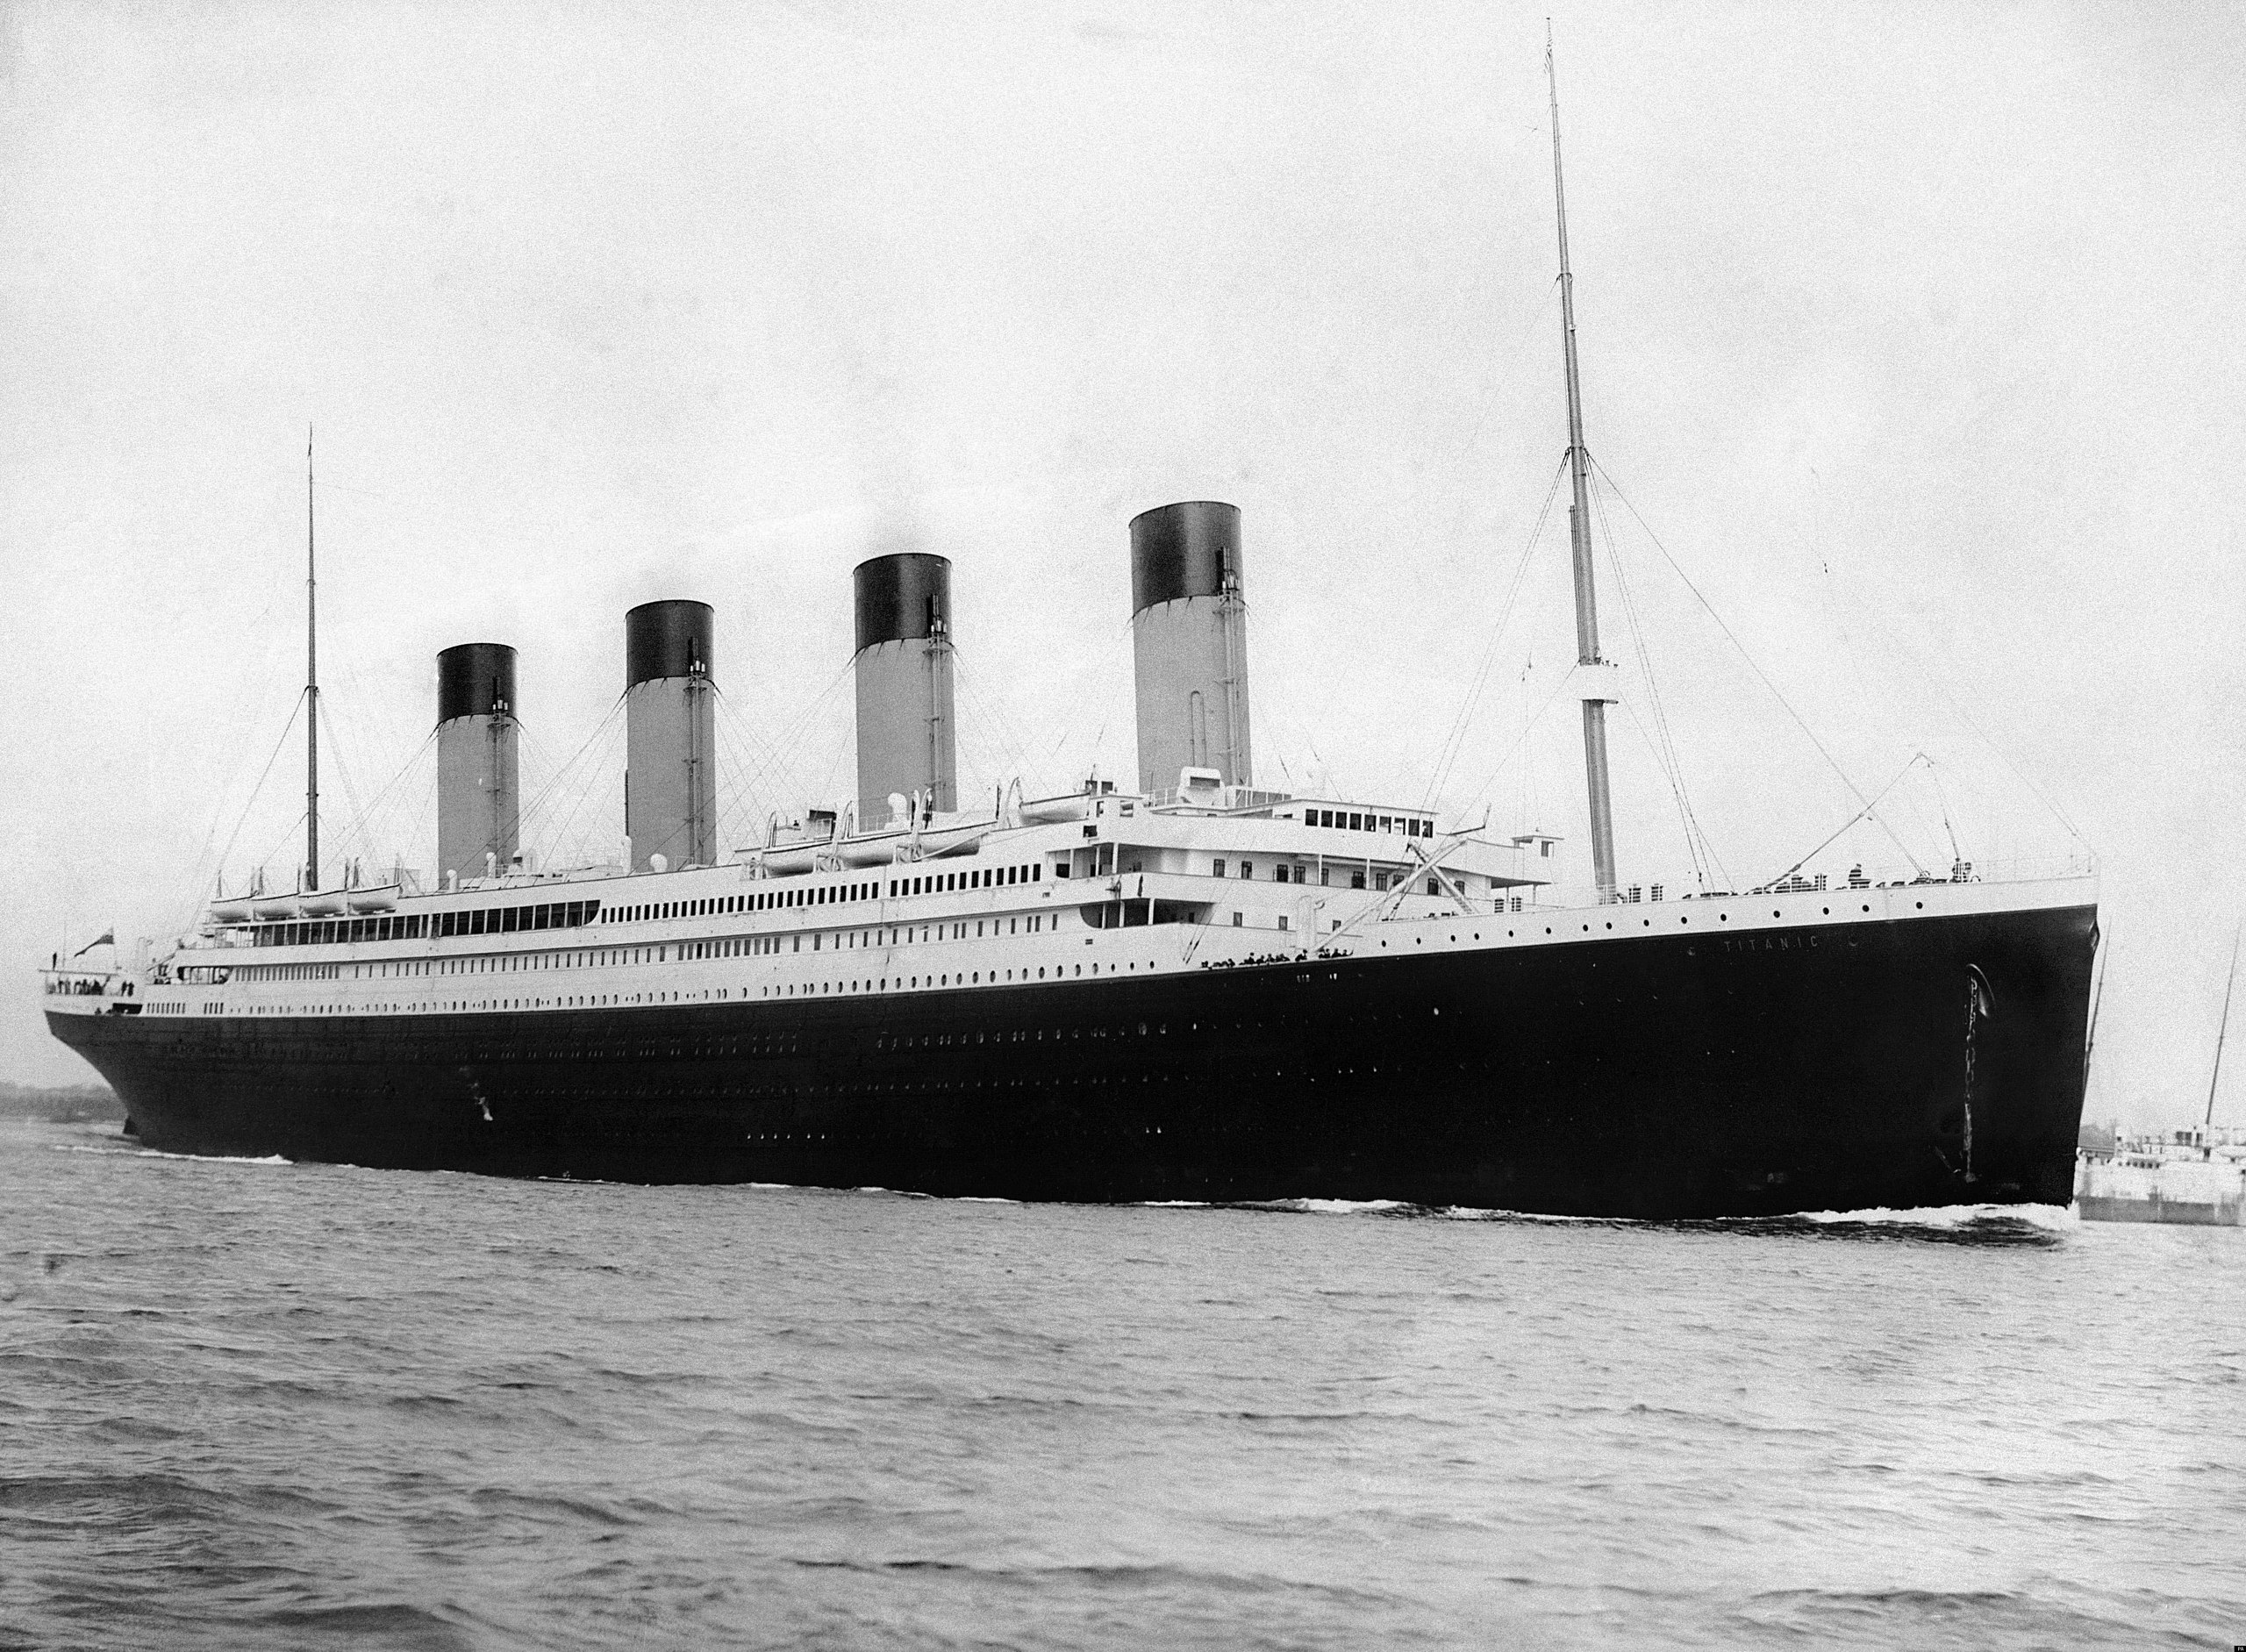

Image by F.G.O. Stuart (1843-1923) - http://www.uwants.com/viewthread.php?tid=3817223&extra=page%3D1, <br>
Public Domain, https://commons.wikimedia.org/w/index.php?curid=2990792

## Working Procedure

We will implement the following procedure:
1. Prepare the development environment - import major libraries, which contain modules and functions we will need.
2. Collect the available data
3. Research the data - get impression of what it contains and shows
4. Prepare the data, so it is possible to use it for machine learning
5. Select a method and algorithm for machine learning
6. Build a model that fits to this data
7. Validate the model - measure its accuracy
8. Implement the best model we have built for further predictions

### 1. Prepare the Environment -  import the necessary Python libraries

In [1]:
# import pandas - a library for structuring the data
import pandas as pd

# import numpy - a library for numerical calculations
import numpy as np

# import matplotlib - a library for printing diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline

# import sklear - the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics

### 2. Collect Available Data 
We have searched and found some published data about the Titanic crash, but camn not expect that is perfectly clean and organized appropriatly for our study. We ofen find sources in plain text or in csv files.

In this demo we will use an *excel file* with a copy of the available original data. 

You have to download the file and store it locally in a folder you remember.
Please, notice, in my example it is a folder called __data__, which is a sibling folder of the current, where my notebook is.

We use *panda*'s functions to load (read) the data from the file into a 2D work __data frame__ - like in a matrix.

__Notice the names of the functions we are using!__

In [2]:
# read the Excel file from your data folder into a data frame
df = pd.read_excel('TitanicSurvival.xls', index_col=None, na_values=['NA'])

Now we want to see what we have read
- the size and the shape of the data - how many rows and columns
- the available attributes of each person's data and their meaning
- few rows to have more precise impression

In [3]:
# see the size and shape of the frame
df.shape

(1309, 14)

In [4]:
# see which are the attribute labels - the columns
list(df)

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

The labels mean the following:
    - pclass: passenger class (1 = first; 2 = second; 3 = third)
    - survival: survival or not (0 = no; 1 = yes)
    - name: name
    - sex: gender
    - age: age
    - sibsp: number of siblings/spouses aboard - family members of same generation as this passenger
    - parch: number of parents/children aboard - family members of different generation of this passenger
    - ticket: ticket number
    - fare: passenger fare
    - cabin: cabin number
    - embarked: port of embarkation (C = Cherbourg, France; Q = Queenstown, Ireland; S = Southampton, UK)
    - boat: lifeboat - the number of the lifeboat, which saved this passenger, if survived
    - body: body number - if the passenger did not survive, but the body was recovered

In [5]:
# see the first five records
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# see the last five records
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### 3. Research the Data

Here we undertake some statistical analysis to see the quantity, the range, and the distribution of the data we have collected. 

In [7]:
# see the types of the attributes
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

The are both integer and floating-poin numbers, as well as strings (objects).
This is important to know in context of the operations we are going to perform.

In [8]:
# get some insights of the value scope
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Here we see the numeric data only.<br>
Non-numeric data can not be included in the statistic above, but it can be visualized.<br>

#### Explanation

<div>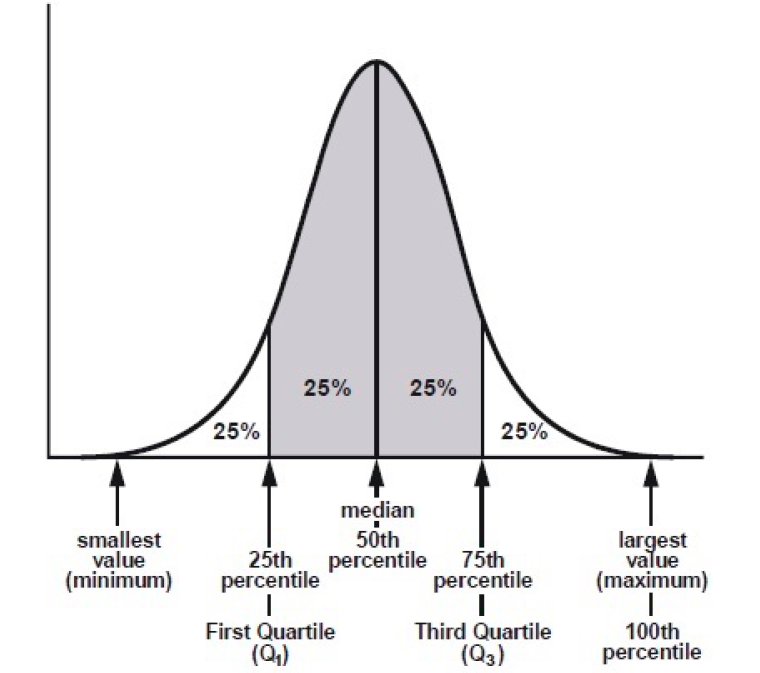</div>

#### Data Visualization

In [9]:
# count the passangers from each harbour
harbour = df['embarked'].value_counts()
harbour

S    914
C    270
Q    123
Name: embarked, dtype: int64

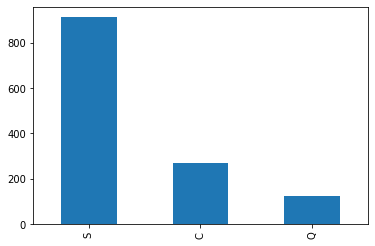

In [10]:
# plot the numbers
harbour.plot(kind='bar')

In [11]:
# count survivers
survived = df['survived'].value_counts()
survived

0    809
1    500
Name: survived, dtype: int64

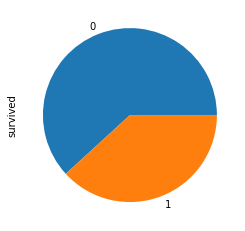

In [12]:
# another type of plot chart
survived.plot(kind='pie')

Incredibly low % of survivals: 38% <br>
Titanic was only carrying 20 lifeboats for 1317 passengers and 885 crew members aboard!

#### Preliminary Data Analysis

Here we try to get deeper into the meaning of the numbers and their role in the survival.

##### The role of the social status - the travel class

In [13]:
# Did the social class matter?
social = df.groupby('pclass').mean()
social

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


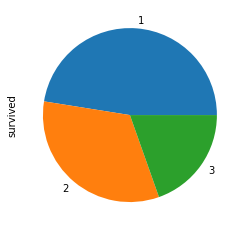

In [14]:
# plot
social['survived'].plot.pie()

##### The role of gender

In [15]:
# Did the gender matter?
gender = df.groupby('sex').mean()
gender

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


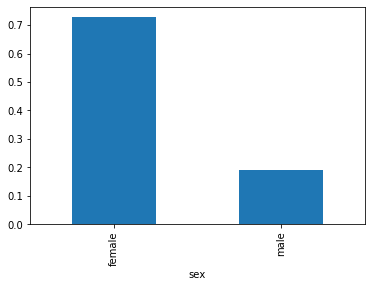

In [16]:
# plot
gender['survived'].plot.bar()

In [17]:
# gender by class
gender_by_class = df.groupby(['pclass','sex']).mean()
gender_by_class

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

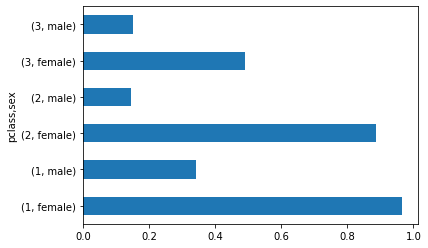

In [18]:
# plot
gender_by_class['survived'].plot.barh()

##### The role of age

In [19]:
# age
age=df.groupby(pd.cut(df.age, bins=8)).mean()
age

,pclass,survived,age,sibsp,parch,fare,body
age,,,,,,,
"(0.0869, 10.146]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044,4.000000
"(10.146, 20.125]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050,159.307692
"(20.125, 30.104]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013,170.393939
"(30.104, 40.083]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507,155.343750
"(40.083, 50.063]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231,151.909091
"(50.063, 60.042]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347,159.777778
"(60.042, 70.021]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250,207.875000
"(70.021, 80.0]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567,96.500000


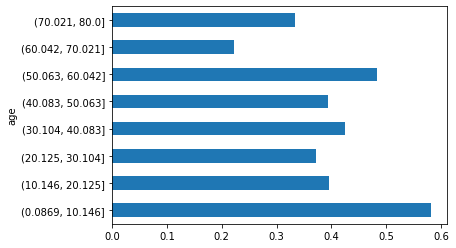

In [20]:
# plot the above table
age['survived'].plot.barh()

In [21]:
# average per range per gender
age_by_gender=df.groupby([(pd.cut(df.age, bins=8)), 'sex']).mean()
age_by_gender

pclass  survived        age     sibsp     parch  \
age              sex                                                         
(0.0869, 10.146] female  2.682927  0.609756   4.355693  1.463415  1.439024   
                 male    2.622222  0.555556   4.257407  1.933333  1.377778   
(10.146, 20.125] female  2.323529  0.735294  17.044118  0.602941  0.455882   
                 male    2.670213  0.148936  17.457447  0.617021  0.351064   
(20.125, 30.104] female  2.158730  0.722222  25.333333  0.476190  0.492063   
                 male    2.485106  0.182979  25.319149  0.246809  0.072340   
(30.104, 40.083] female  1.826667  0.813333  35.306667  0.493333  0.626667   
                 male    2.266667  0.207407  35.018519  0.288889  0.296296   
(40.083, 50.063] female  1.739130  0.782609  45.782609  0.456522  0.913043   
                 male    1.813953  0.186047  45.145349  0.337209  0.139535   
(50.063, 60.042] female  1.160000  0.920000  55.680000  0.640000  0.520000   
                 male    1.540541  0.189189  54.851351  0.270270  0.270270   
(60.042, 70.021] female  1.333333  0.833333  63.166667  0.500000  0.500000   
                 male    1.571429  0.047619  63.642857  0.285714  0.428571   
(70.021, 80.0]   female  1.000000  1.000000  76.000000  1.000000  0.000000   
                 male    1.800000  0.200000  73.300000  0.000000  0.000000   

                              fare        body  
age              sex                            
(0.0869, 10.146] female  26.932924         NaN  
                 male    31.716664    4.000000  
(10.146, 20.125] female  33.923963  226.666667  
                 male    25.105453  139.100000  
(20.125, 30.104] female  42.511079  206.000000  
                 male    20.463863  169.281250  
(30.104, 40.083] female  64.832721  194.000000  
                 male    30.406387  152.766667  
(40.083, 50.063] female  66.778717    7.000000  
                 male    36.810901  158.809524  
(50.063, 60.042] female  89.606832   52.000000  
                 male    43.251803  173.250000  
(60.042, 70.021] female  83.172217         NaN  
                 male    61.018960  207.875000  
(70.021, 80.0]   female  78.850000         NaN  
                 male    25.936680   96.500000

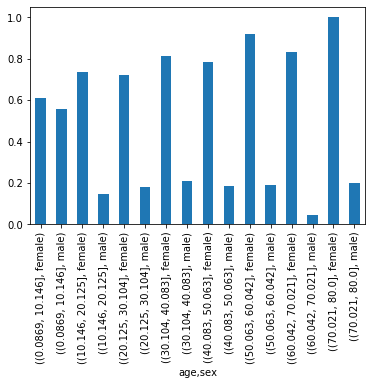

In [22]:
# plot the above table
age_by_gender['survived'].plot.bar()

#### Exercise

It is your turn: visualize the role of the other attributes: __siblings__ and __parents__

In [23]:
# fare (ticket price)
bins = [0,100,200,300,400,500, 600] 
fare=df.groupby([(pd.cut(df.fare, bins))]).mean()

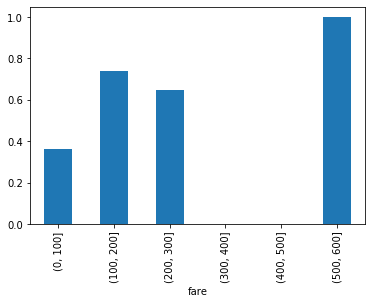

In [24]:
fare['survived'].plot.bar()

### 4. Prepare Data For Machine Learning

#### A. Clean the Data

This includes __cleaning the empty cells__, for example:
- remove the row with empty cells
- remove the column with empty cells
- fill the empty cells with some calculated value, like avg, min, max, etc.

##### Method 1: Remove columns

In [25]:
# remove the columns with empty cells, which are not so informative
df = df.drop(['body', 'cabin', 'boat'], axis=1)

In [26]:
df.shape

(1309, 11)

##### Method 2: Fill cells with constant 'NA' - value Not Available 

In [27]:
# fill the missing home destination with 'NA' 
df["home.dest"] = df["home.dest"].fillna("NA")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


#### Method 3: Fill cells with the average value of the column - good for quantitative data

In [28]:
# fill the missing age cells with the average age
mean_age=df.age.mean()
df['age']= df['age'].fillna(mean_age)

In [29]:
# count again the missing values
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
embarked     2
home.dest    0
dtype: int64

In [30]:
# replace the  missing fare values with the average
mean_fare = df.fare.mean()
mean_fare

33.29547928134572

In [31]:
df['fare'] = df['fare'].fillna(mean_fare)

#### Method 4: Fill in the empty cells with the mode - good for qualitative data

In [32]:
# find the most used 'embarked' value
mode_emb = df.embarked.mode()
mode_emb

0    S
dtype: object

In [33]:
# replace the missing embarked values with the mode
df['embarked']=df['embarked'].fillna('S')

In [34]:
# count again the missing values in each column
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

#### No missing data!

In [35]:
# count the current number of records
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1309
embarked     1309
home.dest    1309
dtype: int64

#### B. Transform String Data Into Numeric

As a preprocessing, we will convert the strings into integer keys, making it easier for the  algorithms to find patterns. 
- sex: “female” and “male” are categorical values and will be converted to __0__ and __1__ respectively
- embarked: the three harbour initials will be transformed into numbers __1__, __2__, and __3__
- name, ticket, and home.dest columns consist of non-categorical string values, which are difficult to use in our algorithm, so we will __drop them__ from the data set

Here is our function that will do the transformation described above:

In [36]:
# define a function for transformation
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['sex'] = le.fit_transform(df['sex'])
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name','ticket','home.dest'], axis=1)
    return processed_df

In [37]:
# call the transformation function
dfp = preprocessor(df)

In [38]:
# Check the result
dfp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [39]:
# Check the final size and shape of our cleaned data
dfp.shape

(1309, 8)

#### C. Split Input and Output Data

Separate the column 'survived' from the rest - it will be the output vector __y__, while the rest of the matrix will be used ax input __X__.

In [40]:
# Split the data into input and output
y = dfp['survived']
y.shape

(1309,)

In [41]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [42]:
X = dfp.drop(['survived'], axis=1).values

In [43]:
X.shape

(1309, 7)

In [44]:
X

array([[  1.    ,   0.    ,  29.    , ...,   0.    , 211.3375,   2.    ],
       [  1.    ,   1.    ,   0.9167, ...,   2.    , 151.55  ,   2.    ],
       [  1.    ,   0.    ,   2.    , ...,   2.    , 151.55  ,   2.    ],
       ...,
       [  3.    ,   1.    ,  26.5   , ...,   0.    ,   7.225 ,   0.    ],
       [  3.    ,   1.    ,  27.    , ...,   0.    ,   7.225 ,   0.    ],
       [  3.    ,   1.    ,  29.    , ...,   0.    ,   7.875 ,   2.    ]])

#### D. Split the Data Into Train Set and Test Set
We will use only 80% of our dataset for __training__ a machine learning model and will leave the rest 20% to be used for __testing__ the model, once we have bult it. <br>
As a result we will continue with four sub-sets:
- 80% of X for training
- 20% of X for testing
- 80% of y for training
- 20% of y for testing

In [45]:
# Split Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 5. Select a Method and Algorithm for Machine Learning

We select a method called __Decission Tree Classifier__. <br>
The explanation of this method and the argumentation of choosing it are not a subject of today's lesson and will come later :)

In [46]:
# Select a method
dt = tree.DecisionTreeClassifier(max_depth=10)

### 6. Train Model That Fits To This Data

We will use the method and the algorithm for building a model, which can explain the patterns in our data.<br>
We use the two sub-sets we left for trainig.

In [47]:
# Train a model
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

After this operation, __dt__ is our model. If we implement it for new, unseen input data, it will have to predict a correect output. <br>
Before implementation, we want to test it.

### 7. Validate the Model

We test the model we built above by making it work on out test data - these two sub-sets we left for test.

In [48]:
# Validate the model
dt.score(X_test, y_test)

0.767175572519084

The resulting value is the __model accuracy__. It means that the model would correctly predict the survival of this procent of the unknown cases. Not bad for start!<br>
Anyway, we will try to improve the procent.<br>
Let us repeat steps 5, 6, and 7.

In [49]:
# 5. Try another algorithm
import sklearn.ensemble as ske
rf = ske.RandomForestClassifier(n_estimators=50)

In [50]:
# 6. Train the second model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
# 7. Test the second model
rf.score(X_test, y_test)

0.8244274809160306

The second algorithm didn't perform better.<br>
Let's try again.

In [52]:
# 5. Try another method and algorithm
import sklearn.ensemble as ske
gb = ske.GradientBoostingClassifier(n_estimators=50)

In [53]:
# 6. Train the third model
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
# 7. Test the third model
gb.score(X_test, y_test)

0.8206106870229007

Let's try also combination of methods and algorithms.

In [55]:
# 5. Try combination of methods
import sklearn.ensemble as ske
eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])

In [56]:
# 6. Train the combination
eclf.fit (X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=10,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
     

In [57]:
# 7. Test the combination
eclf.score (X_test, y_test)

0.8244274809160306

#### Evaluate the performance with the test data

In [58]:
# Test the classifier with the test input data
prediction = eclf.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [59]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

Non-survival       0.82      0.91      0.86       161
    Survival       0.83      0.68      0.75       101

    accuracy                           0.82       262
   macro avg       0.83      0.80      0.81       262
weighted avg       0.83      0.82      0.82       262



In [60]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, eclf.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

Non-survival       0.89      0.98      0.94       648
    Survival       0.97      0.81      0.88       399

    accuracy                           0.92      1047
   macro avg       0.93      0.90      0.91      1047
weighted avg       0.92      0.92      0.92      1047

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

Non-survival       0.82      0.91      0.86       161
    Survival       0.83      0.68      0.75       101

    accuracy                           0.82       262
   macro avg       0.83      0.80      0.81       262
weighted avg       0.83      0.82      0.82       262



### 8. Implement the Model for  Prediction with New Data
Once the model is trained, tested, evaluated, and accepted, we can use it to predict the survival of hypotetical passengers in disaster.

Let's first try with a case of our avalable data: take a row from X_test, for which we know also y_test and make an 'unit test'.

In [61]:
list(X_test[0])

[2.0, 1.0, 19.0, 0.0, 0.0, 10.5, 2.0]

In [62]:
list(y_test[:1])


[0]

In [87]:
# Enter a new data set for a person
# my_set1 = ([[1,0,29.00,0,0,211.3375,0]])
my_set2 = ([[1.0, 0.0, 33.0, 0.0, 0.0, 151.55, 2.0]])
my_set3 = ([[3.0, 1.0, 24.0, 0.0, 0.0, 8.05, 2.0]])
Andreas = ([[3.0, 1.0, 24.0, 1.0, 0.0, 12, 2.0]])

In [90]:
prediction = eclf.predict(Andreas)
prediction

array([0], dtype=int64)

It works!

## Reference
https://www.kaggle.com/c/titanic/data <br>
https://blog.socialcops.com/technology/data-science/machine-learning-python/<br>
https://www.youtube.com/watch?v=siEPqQsPLKA